   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Preparacion para Clasificacion)
# El objetivo de este Notebook es SOLO agregar YHat


In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1D"
NUM_FEATURES = 0

In [4]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

EURUSD_ASK_1H_14F.csv
EURUSD_FULL_1D_20F.csv
EURUSD_FULL_1H_20F.csv
EURUSD_FULL_1M_20F.csv
EURUSD_FULL_4H_20F.csv


## Read CSV

### Read Dataset From Regression

In [5]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[1], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

       Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0    2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1    2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2    2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3    2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4    2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   
...         ...      ...      ...      ...      ...           ...       ...   
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  2.219154e+05   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  3.392159e+05   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  2.907155e+05   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  3.306924e+05   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158  1.012642e+04   1.11129   

      High_Bid  Low_Bid  Close_Bid    Volume_Bid   

### Add Col 'YHat' 

In [6]:
DATASET_FULL['Class'] = 0


NEG_UNO = -0.0007
UNO = 0.0007
NEG_DOS = -0.0035
DOS = 0.0035

DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] <= NEG_UNO, 'Class'] = -1
DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] >= UNO, 'Class'] = 1

DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] <= NEG_DOS, 'Class'] = -2
DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] >=  DOS, 'Class'] = 2
print(DATASET_FULL.head())

    Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0 2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1 2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2 2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3 2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4 2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   

   High_Bid  Low_Bid  Close_Bid  ...   Spread  day_name weekday  \
0   1.26035  1.24679    1.25723  ...  0.00010  Thursday       3   
1   1.26263  1.25198    1.25806  ...  0.00026    Friday       4   
2   1.26477  1.25779    1.26308  ...  0.00010    Sunday       6   
3   1.26924  1.26288    1.26820  ...  0.00010    Monday       0   
4   1.28083  1.26650    1.27140  ...  0.00010   Tuesday       1   

   Pct_Range_Close  Pct_Range_Close_diff  MA_Close_5  MA_Close_25  \
0         0.000000              0.000000    0.000000          0.0   
1 

In [7]:
DATASET_FULL['Class']

0       0
1       1
2       2
3       2
4       1
       ..
5132    2
5133    1
5134    2
5135    1
5136    1
Name: Class, Length: 5137, dtype: int64

In [8]:
DATASET_FULL['Class'] = DATASET_FULL['Class'].shift(-1)

In [9]:
DATASET_FULL['Class'].fillna(0, inplace=True)
DATASET_FULL['Class']

0       1.0
1       2.0
2       2.0
3       1.0
4      -2.0
       ... 
5132    1.0
5133    2.0
5134    1.0
5135    1.0
5136    0.0
Name: Class, Length: 5137, dtype: float64

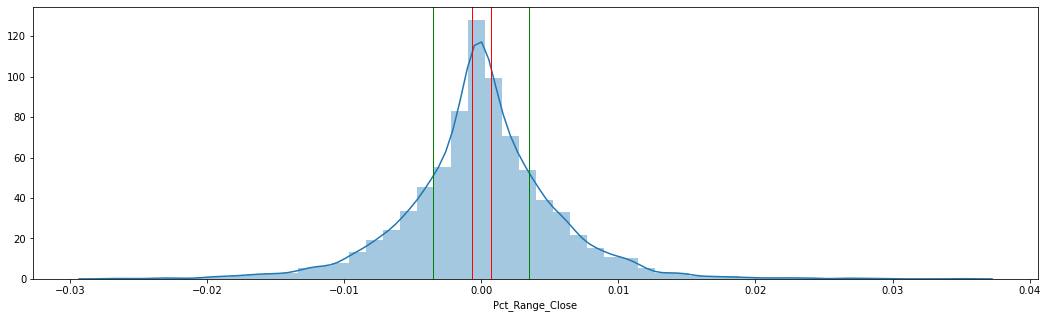

In [10]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Pct_Range_Close']);
plt.axvline(UNO, 0, 1, linewidth=1, color='r')
plt.axvline(NEG_UNO, 0, 1, linewidth=1, color='r')
plt.axvline(DOS, 0, 1, linewidth=1, color='g')
plt.axvline(NEG_DOS, 0, 1, linewidth=1, color='g')

In [11]:
DATASET_FULL['Class'].describe()

count    5137.000000
mean       -0.003309
std         1.437221
min        -2.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Class, dtype: float64

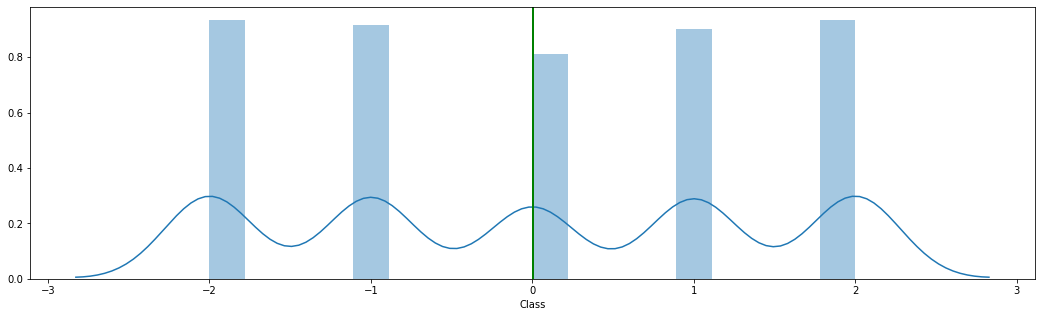

In [12]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Class']);
plt.axvline(0.0008, 0, 1, linewidth=1, color='r')
plt.axvline(-0.0008, 0, 1, linewidth=1, color='r')
plt.axvline(0.005, 0, 1, linewidth=1, color='g')
plt.axvline(-0.005, 0, 1, linewidth=1, color='g')

In [13]:
DATASET_FULL['Class'].value_counts()

 2.0    1067
-2.0    1066
-1.0    1048
 1.0    1029
 0.0     927
Name: Class, dtype: int64

In [14]:
DATASET_FULL[['Close','Pct_Range_Close','Class']].head(10)

,Close,Pct_Range_Close,Class
0,1.25733,0.000000,1.0
1,1.25832,0.000787,2.0
2,1.26318,0.003862,2.0
3,1.26830,0.004053,1.0
4,1.27150,0.002523,-2.0
5,1.26377,-0.006079,2.0
6,1.27696,0.010437,2.0
7,1.28149,0.003547,1.0
8,1.28477,0.002560,-2.0
9,1.27390,-0.008461,2.0


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [16]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = '5C-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

5C-EURUSD_FULL_1D_21F.csv


In [17]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)